<a href="https://colab.research.google.com/github/Hetav01/ML-EDAs/blob/main/Adult_Data_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EDA on Adult Dataset**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataset = pd.read_csv("adult.csv")

In [ ]:
dataset.columns = ["Age", "Workclass", "fnlwgt", "Education", "EduNum", "MaritalStat", "Occupation", "Relationship", "Race", "Gender", "CapitalGain", "CapitalLoss", "HoursWorked", "Native", "Income"]

In [ ]:
dataset

,Age,Workclass,fnlwgt,Education,EduNum,MaritalStat,Occupation,Relationship,Race,Gender,CapitalGain,CapitalLoss,HoursWorked,Native,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
dataset.columns.values

array(['Age', 'Workclass', 'fnlwgt', 'Education', 'EduNum', 'MaritalStat',
       'Occupation', 'Relationship', 'Race', 'Gender', 'CapitalGain',
       'CapitalLoss', 'HoursWorked', 'Native', 'Income'], dtype=object)

In [ ]:
dataset.head(10)

,Age,Workclass,fnlwgt,Education,EduNum,MaritalStat,Occupation,Relationship,Race,Gender,CapitalGain,CapitalLoss,HoursWorked,Native,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


## **Let's find all the categorical and numerical features.**

**Categorical:** Income, Race, Gender, native-country, marital-stat, education, workclass, relationship

**Numerical:** Age, EduNum, CapitalGain, CapitalLoss, fnlwgt

## **Cleaning and Polishing the data.**

So we need to predict whether the income is greater than 50K$ or not.

We will analyse how each feature affects the income being greater or smaller than 50K$.

For that let's convert the income column into something more palatable(i.e 0s and 1s). 

In [ ]:
dataset['IncomeNum'] = dataset.apply(lambda row: 1 if '>50K' in row['Income'] else 0, axis=1)

## **Removing reduntant and useless features from the dataset.**


In [ ]:
dataset[dataset["CapitalGain"] > 0].shape

(2711, 16)

In [ ]:
dataset[dataset["CapitalGain"] == 0].shape

(29849, 16)

In [ ]:
dataset[dataset["CapitalLoss"] > 0].shape

(1519, 16)

In [ ]:
dataset[dataset["CapitalLoss"] == 0].shape

(31041, 16)

This above conclusion shows that most of the "CapitalGain" and "CapitalLoss" are centered at 0. This means the gain for most of them is also 0.

In [ ]:
for data in dataset:
  dataset["CapitalChange"] = dataset["CapitalGain"] - dataset["CapitalLoss"]


In [ ]:
dataset = dataset.drop(["Income", "EduNum", "CapitalGain", "CapitalLoss"], axis= 1)

In [ ]:
dataset.describe() 

,Age,fnlwgt,HoursWorked,IncomeNum,CapitalChange
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,40.437469,0.240817,990.308661
std,13.640642,1.055498e+05,12.347618,0.427586,7409.097824
min,17.000000,1.228500e+04,1.000000,0.000000,-4356.000000
25%,28.000000,1.178315e+05,40.000000,0.000000,0.000000
50%,37.000000,1.783630e+05,40.000000,0.000000,0.000000
75%,48.000000,2.370545e+05,45.000000,0.000000,0.000000
max,90.000000,1.484705e+06,99.000000,1.000000,99999.000000


**For Age:** 
1. The mean is 38.6 years.
2. The standard deviation is about 13.6 years.
3. The difference in the values after the 3rd quartile is high. This means that the dispersion is higher after the value 48.
4. The distribuiton is right skewed as the difference between mean and the max is very large. and the difference in the mean and median is not that large.



# **Analysing the data by pivoting features.**

Pivot table is an operation that allows us to take columned values of the data as input and group the entries into a two-dimensional table that provides a summarisation of the data.

Simple aggregations can give you a flavor of your dataset, but often we would prefer to aggregate conditionally on some label or index: this is implemented in the so-called groupby operation. The name "group by" comes from a command in the SQL database language, but it is perhaps more illuminative to think of it in the terms first coined by Hadley Wickham of Rstats fame: split, apply, combine.

In [ ]:
#let's see the correlation of income and the education they have.
dataset[["Education", "IncomeNum"]].groupby(["Education"]).count()

,IncomeNum
Education,
10th,933
11th,1175
12th,433
1st-4th,168
5th-6th,333
7th-8th,646
9th,514
Assoc-acdm,1067
Assoc-voc,1382


In [ ]:
dataset.groupby(["Education", "IncomeNum"])["IncomeNum"].count()

Education      IncomeNum
 10th          0             871
               1              62
 11th          0            1115
               1              60
 12th          0             400
               1              33
 1st-4th       0             162
               1               6
 5th-6th       0             317
               1              16
 7th-8th       0             606
               1              40
 9th           0             487
               1              27
 Assoc-acdm    0             802
               1             265
 Assoc-voc     0            1021
               1             361
 Bachelors     0            3133
               1            2221
 Doctorate     0             107
               1             306
 HS-grad       0            8826
               1            1675
 Masters       0             764
               1             959
 Preschool     0              51
 Prof-school   0             153
               1             423
 Some-college  0  

In [ ]:
dataset.groupby(["Occupation", "IncomeNum"])["IncomeNum"].count()

#this clearly shows that in any particular occupation the majority of the people are earning below the 50K mark.

Occupation          IncomeNum
 ?                  0            1652
                    1             191
 Adm-clerical       0            3262
                    1             507
 Armed-Forces       0               8
                    1               1
 Craft-repair       0            3170
                    1             929
 Exec-managerial    0            2098
                    1            1968
 Farming-fishing    0             879
                    1             115
 Handlers-cleaners  0            1284
                    1              86
 Machine-op-inspct  0            1752
                    1             250
 Other-service      0            3158
                    1             137
 Priv-house-serv    0             148
                    1               1
 Prof-specialty     0            2281
                    1            1859
 Protective-serv    0             438
                    1             211
 Sales              0            2667
                    

In [ ]:
#important comaparison.
dataset.groupby(["Gender", "IncomeNum"])["IncomeNum"].count()

Gender   IncomeNum
 Female  0             9592
         1             1179
 Male    0            15127
         1             6662
Name: IncomeNum, dtype: int64

In [ ]:
dataset[["Gender", "IncomeNum"]].groupby("Gender").count()

,IncomeNum
Gender,
Female,10771
Male,21789


In [ ]:
dataset.groupby(["Occupation", "Gender", "IncomeNum"])["IncomeNum"].count()

Occupation          Gender   IncomeNum
 ?                   Female  0             789
                             1              52
                     Male    0             863
                             1             139
 Adm-clerical        Female  0            2325
                             1             212
                     Male    0             937
                             1             295
 Armed-Forces        Male    0               8
                             1               1
 Craft-repair        Female  0             202
                             1              20
                     Male    0            2968
                             1             909
 Exec-managerial     Female  0             879
                             1             280
                     Male    0            1219
                             1            1688
 Farming-fishing     Female  0              63
                             1               2
                     

## **EDA.**


In [ ]:
dataset

,Age,Workclass,fnlwgt,Education,MaritalStat,Occupation,Relationship,Race,Gender,HoursWorked,Native,IncomeNum,CapitalChange
0,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,0,0
1,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,0,0
2,53,Private,234721,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,0,0
3,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,0,0
4,37,Private,284582,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,United-States,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,0,0
32556,40,Private,154374,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,1,0
32557,58,Private,151910,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,0,0
32558,22,Private,201490,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,0,0


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


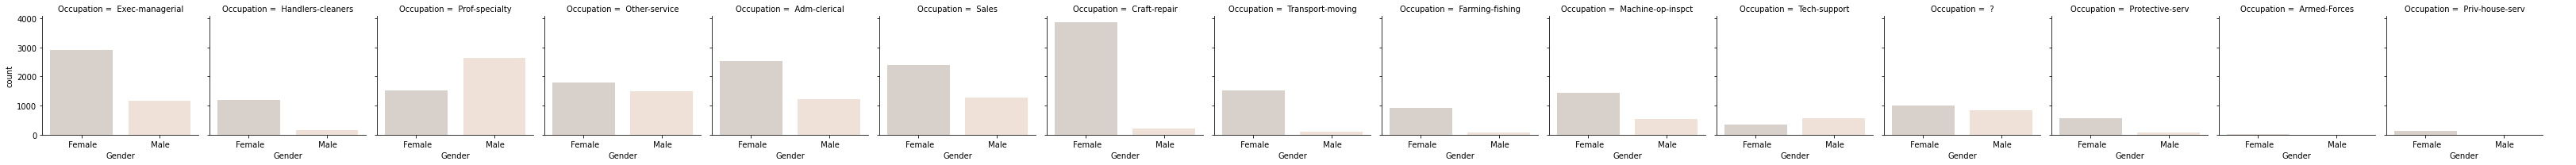

In [ ]:
grid = sns.FacetGrid(dataset, col= "Occupation")
grid.map(sns.countplot, "Gender", palette= "copper", alpha=.25)
grid.add_legend()

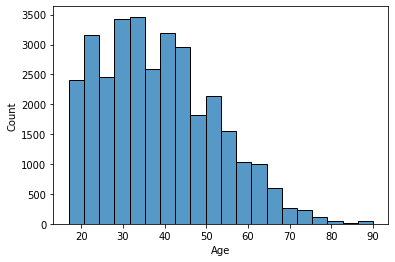

In [ ]:
sns.histplot(x= "Age", bins= 20, data= dataset)

In [ ]:
dataset[(dataset["Age"] >= 60) & (dataset["IncomeNum"] == 1)].shape

(652, 13)

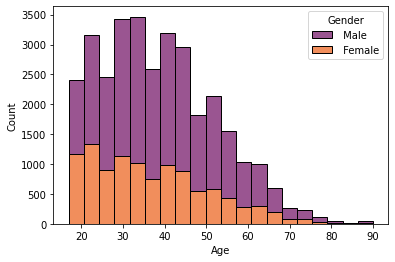

In [ ]:
sns.histplot(x= "Age", hue= "Gender", data= dataset, bins= 20, palette= "inferno", multiple="stack")

The above histograms shows that :

1.  "age" attribute is not symmetric.
2.  It is right-skewed
3.  Minimum and Maximum age of the people is 17 and 90 respectively.
4.  This dataset has fewer observations(652) of people's age after certain age i.e. 60 years.
5. Majority of the census is Male.






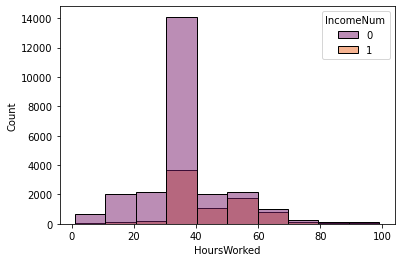

In [ ]:
sns.histplot(x= "HoursWorked", data= dataset, hue="IncomeNum", bins= 10, palette= "inferno")

In [ ]:
dataset[(dataset["HoursWorked"] >= 70) & (dataset["IncomeNum"] == 0)].shape

(513, 13)

In [ ]:
dataset[(dataset["HoursWorked"] >= 70) & (dataset["IncomeNum"] == 1)].shape

(276, 13)

The above histograms shows that :

1. It is right-skewed.
2. Majority of the people work around 30-40 hrs/week.

Also astonishingly, even for the number of people working more than 70hrs, 53% are earning more than 50K $.

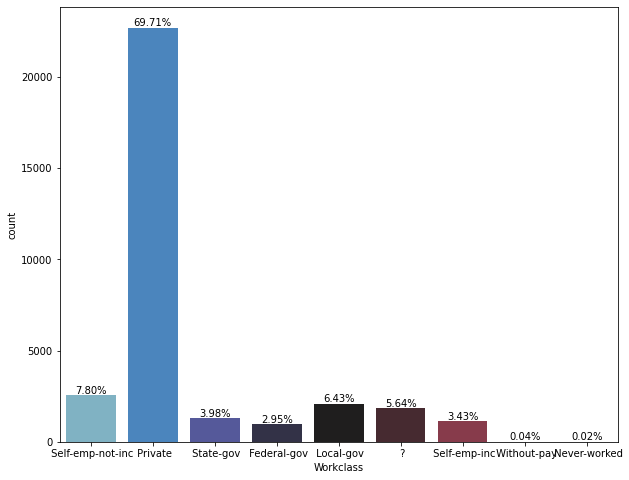

In [ ]:
plt.figure(figsize=(10,8))
d1 = sns.countplot(x= "Workclass", data= dataset, palette= "icefire")
total = float(len(dataset["IncomeNum"]))
for p in d1.patches:
  height = p.get_height()
  d1.text(p.get_x() + p.get_width()/2, height + 100, '{:1.2f}%'.format((height/total)*100), ha="center")

#the last line is a matplotlib method to include text on the top of the bar.

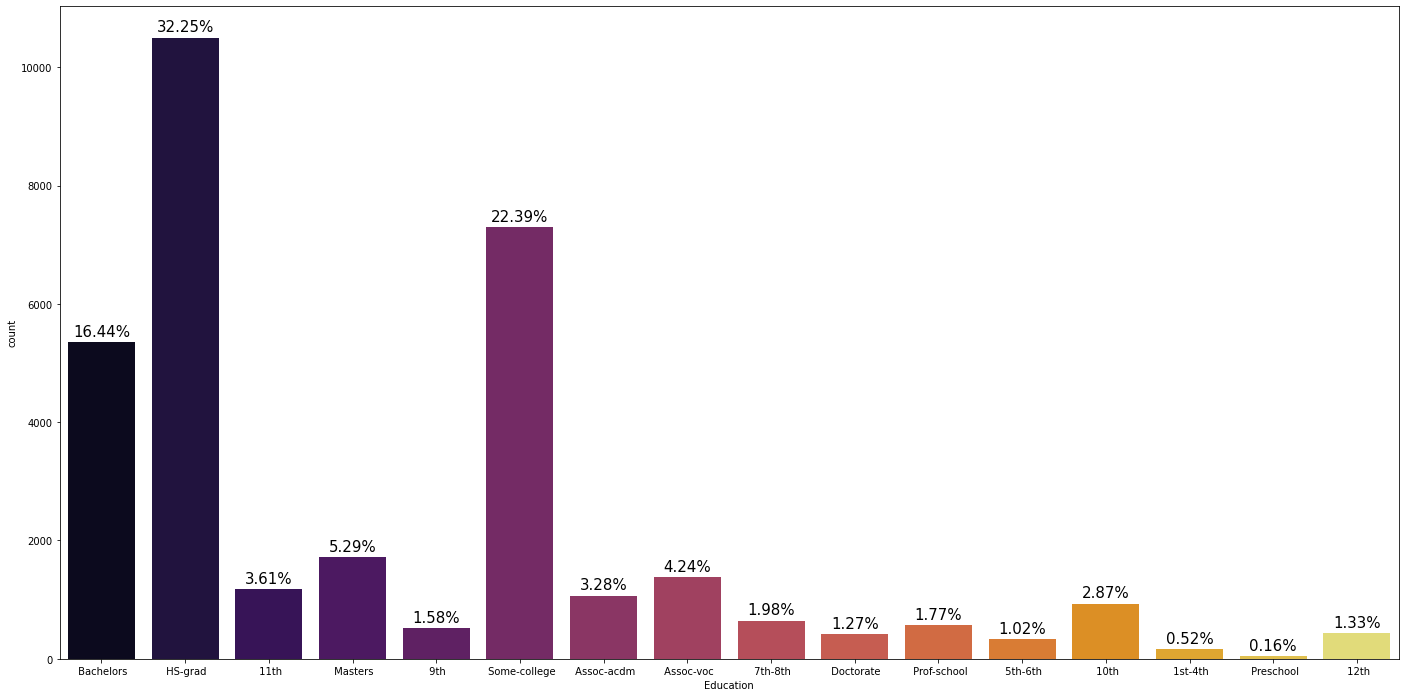

In [ ]:
plt.figure(figsize= (24, 12))
total = float(len(dataset["IncomeNum"]))
d2 = sns.countplot(x= "Education", data= dataset, palette= "inferno")

for p in d2.patches:
  height = p.get_height()
  d2.text(p.get_x() + p.get_width()/2, height + 100, "{:1.2f}%".format((height/total)*100), ha= "center", fontsize= 15  )

In [ ]:
dataset

,Age,Workclass,fnlwgt,Education,MaritalStat,Occupation,Relationship,Race,Gender,HoursWorked,Native,IncomeNum,CapitalChange
0,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,0,0
1,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,0,0
2,53,Private,234721,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,0,0
3,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,0,0
4,37,Private,284582,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,United-States,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,0,0
32556,40,Private,154374,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,1,0
32557,58,Private,151910,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,0,0
32558,22,Private,201490,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,0,0


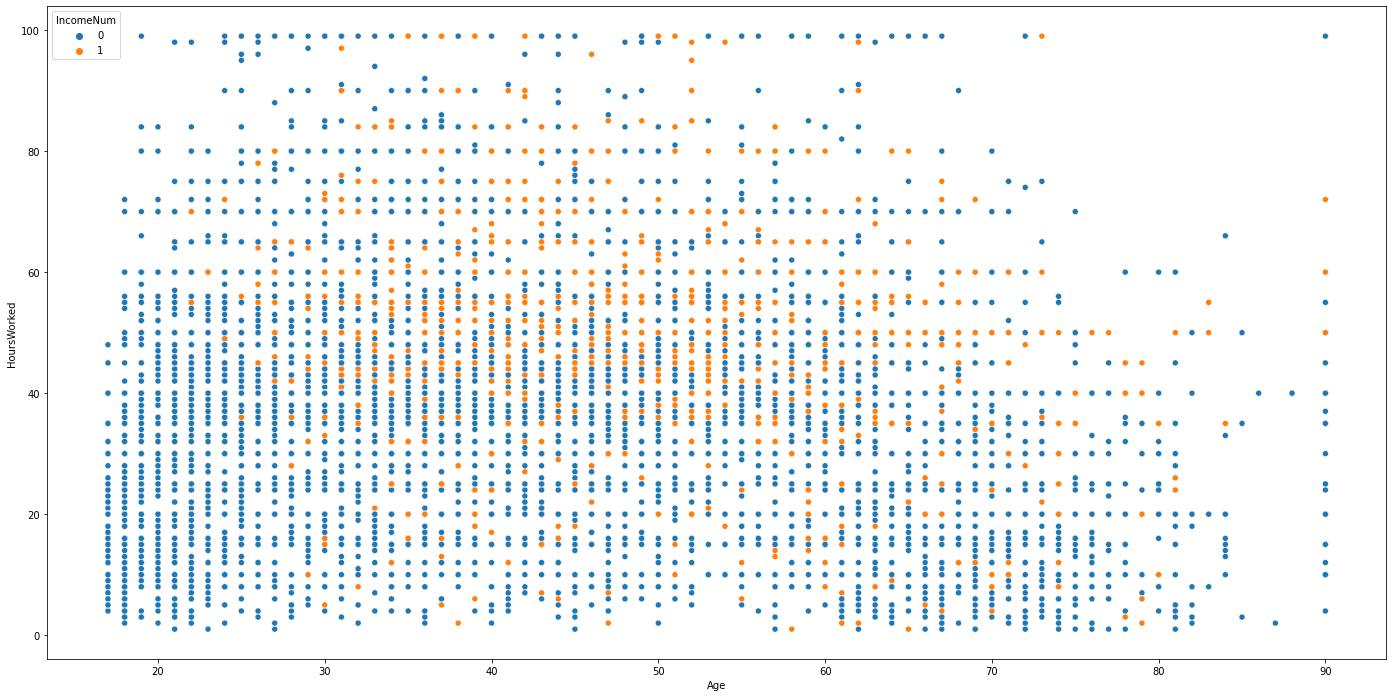

In [ ]:
plt.figure(figsize= (24, 12))
sns.scatterplot(data= dataset, x= "Age", y= "HoursWorked", hue= "IncomeNum")

We can thus create countplots for all the categorical variables similarly.

## **Bivariate Analysis.**

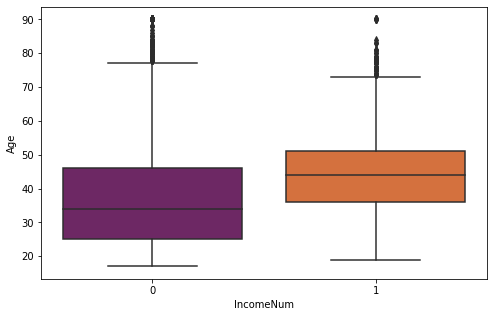

In [ ]:
fig = plt.figure(figsize= (8, 5))

sns.boxplot(x= "IncomeNum", y= "Age", data= dataset, palette= "inferno")

In [ ]:
dataset[["IncomeNum", "Age"]].groupby(["IncomeNum"]).mean()

,Age
IncomeNum,
0,36.783648
1,44.249841


1. The mean age of the people earning <=50K is 36.78.
2. The mean age of the people earning >50K is 44.24.


### **Statistical Testing between one Continuous and another Categorical variable:**

1.   T-test
2.   ANOVA



### **Statistical Test between Two Categorical variables:**

1. Chi-squared Test

### **Hypothesis Testing.**

Null: There is no difference in the means of the income group >=50k and < 50k.

Alternate: There is a difference between the means.

### **Age and incomeNum**

In [ ]:
from scipy import stats  
import random
testData = dataset[(np.abs(stats.zscore(dataset["Age"])) < 3)]


In [ ]:
incomeNum1 = testData[testData["IncomeNum"] == 1]["Age"]
incomeNum0 = testData[testData["IncomeNum"] == 0]["Age"]

#converting to a list from a numpy array.
incomeNum1 = incomeNum1.values.tolist()
incomeNum1 = random.sample(incomeNum1, 100) #picking 100 random numbers from the sample => incomeNum1
incomeNum0 = incomeNum0.values.tolist()
incomeNum0 = random.sample(incomeNum0, 100) #picking 100 random numbers from the sample => incomeNum0

In [ ]:
#now we do the t-test
from scipy.stats import ttest_ind

ttest, pval = ttest_ind(incomeNum1, incomeNum0, equal_var= False)
print(ttest)
print(pval)

if pval < 0.05:
  print("We reject null hypothesis.")
else:
  print("We failed to reject the null hypothesis.")

4.874043932984902
2.3028086933192195e-06
We reject null hypothesis.


This means that we **rejected the null hypothesis**.

This suggests that **there is some difference in the mean** of the two groups of incomes.

### **fnlwgt and incomeNum**

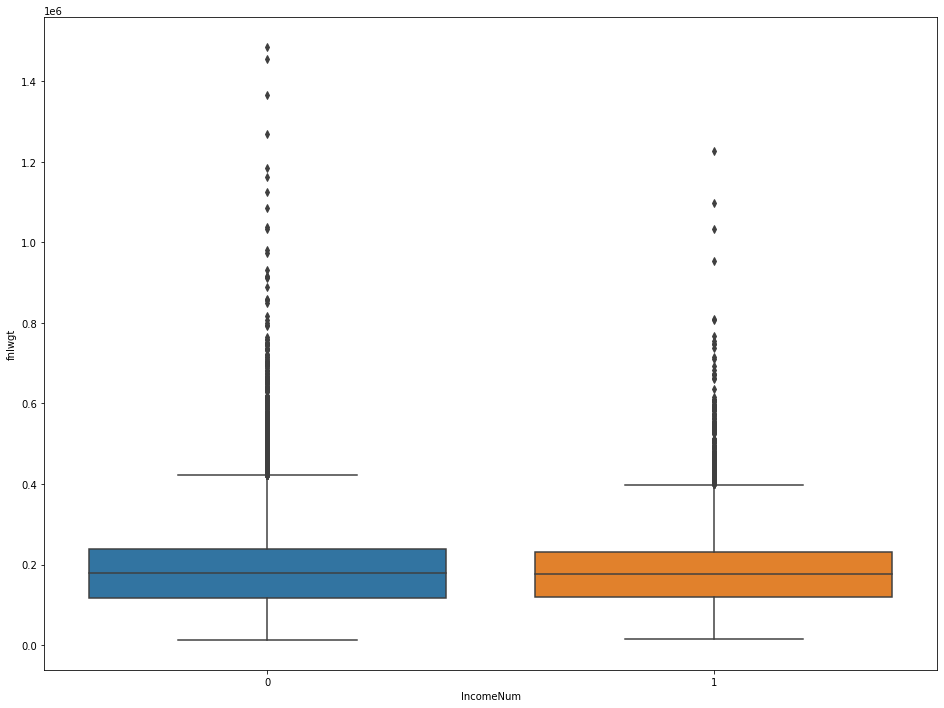

In [ ]:
plt.figure(figsize= [16, 12])
sns.boxplot(data= dataset, x= "IncomeNum", y= "fnlwgt")

In [ ]:
dataset[["fnlwgt", "IncomeNum"]].groupby(["IncomeNum"]).mean()

,fnlwgt
IncomeNum,
0,190345.429467
1,188005.000000


**Hypothesis Testing.**

Null Hypothesis :- there is no difference in Mean of income group >50k and income group <=50k.

Alternate Hypothesis :- there is difference in Mean of income group >50k and income group <=50k.

In [ ]:
import random
from scipy import stats
from scipy.stats import ttest_ind

testData = dataset[np.abs(stats.zscore(dataset["fnlwgt"]) < 3)]
income1 = testData[testData["IncomeNum"] == 1]["fnlwgt"]
income1 = income1.values.tolist()
income1 = random.sample(income1, 100)
income0 = testData[testData["IncomeNum"] == 0]["fnlwgt"]
income0 = income0.values.tolist()
income0 = random.sample(income0, 100)

In [ ]:
ttest, pval = ttest_ind(income1, income0, equal_var= False)
print(ttest)
print(pval)

if pval <0.05:
    print("we reject null hypothesis")
else:
    print("we accept null hypothesis")

-1.4156707266346782
0.1584512930611951
we accept null hypothesis


It clearly shows that the final weight has **no contribution** to the distinguish income group.

Similarly we test the hypothesis using the ttest for each continous attribute with incomeNum.

Now we test the hypothesis of some categorical variables to know their impact on predicting the Income Group.

### **Workclass and incomeNum**

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


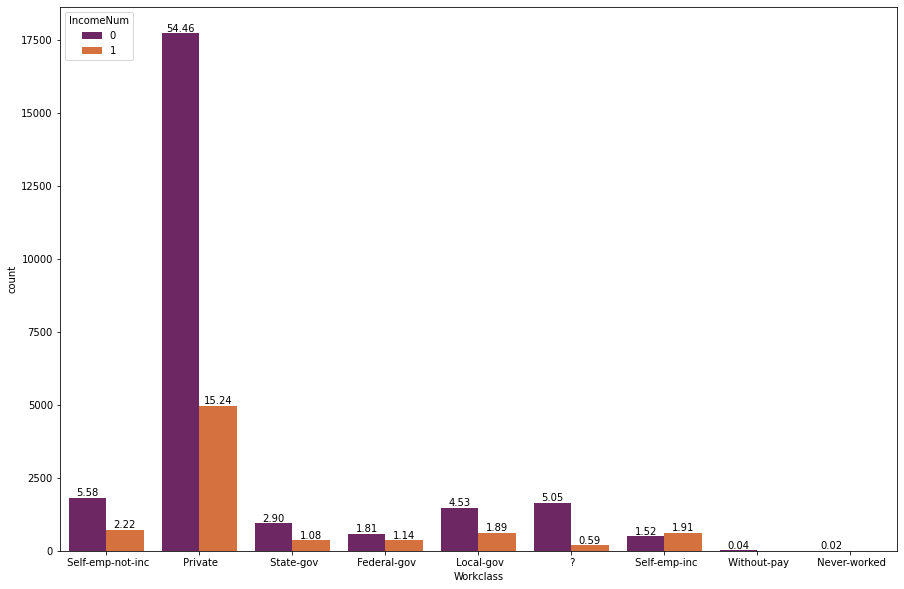

In [ ]:
plt.figure(figsize= (15, 10))

ax = sns.countplot(data= dataset, x= "Workclass", hue= "IncomeNum", palette= "inferno")
for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x() + p.get_width()/2, height + 50, '{:1.2f}'.format((height/total)*100), ha="center")


**Hypothesis testing.**

Now we are analysing two categorical variable, hence we will use the **Chi-Square Test** to conclude whether the observed proportions are different from the hypothesized proportions.



In [ ]:
#construct a cross table.
crossTab = pd.crosstab(dataset["Workclass"], dataset["IncomeNum"], margins= False) 
crossTab

IncomeNum,0,1
Workclass,,
?,1645,191
Federal-gov,589,371
Local-gov,1476,617
Never-worked,7,0
Private,17733,4963
Self-emp-inc,494,622
Self-emp-not-inc,1817,724
State-gov,944,353
Without-pay,14,0


If Statistical chi-square value >= Critical Value:
reject the null hypothesis; **Dependent**

If Statistical chi-square value < Critical Value:
fail to reject the null hypothesis; **Independent**

**H0(Null Hypothesis)** : There is no relationship between workclass and income.

**H1(Alternate Hypothesis)** : There is a relationship between workclass and income.


In [ ]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

stat, p, dof, expected = chi2_contingency(crossTab)
print('dof=%d' % dof)
print('p_value', p)
print(expected)

prob = 0.95
critical = chi2.ppf(prob, dof)
print("probability= %.3f, critical= %.3f, stat= %.3f" % (prob, critical, stat))
if abs(stat) >= critical:
    print("Dependent")
else:
    print("Independent")

dof=8
p_value 1.9613536197342886e-220
[[1.39386007e+03 4.42139926e+02]
 [7.28815725e+02 2.31184275e+02]
 [1.58897012e+03 5.04029883e+02]
 [5.31428133e+00 1.68571867e+00]
 [1.72304184e+04 5.46558157e+03]
 [8.47248280e+02 2.68751720e+02]
 [1.92908412e+03 6.11915878e+02]
 [9.84660412e+02 3.12339588e+02]
 [1.06285627e+01 3.37143735e+00]]
probability= 0.950, critical= 15.507, stat= 1045.774
Dependent
